<a href="https://colab.research.google.com/github/bigArmadillo/ML-Project-1/blob/master/LSTM_model_for_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# RECURRENT NEURAL NETWORK

#### STEP-1- Data Preprocessing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from google.colab import files
uploaded = files.upload()


Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_test  = pd.read_csv('Google_Stock_Price_Test.csv')

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [8]:
dataset_train.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [20]:
plt.style.use('ggplot')

sns.set_style('whitegrid')

<Figure size 1800x1080 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


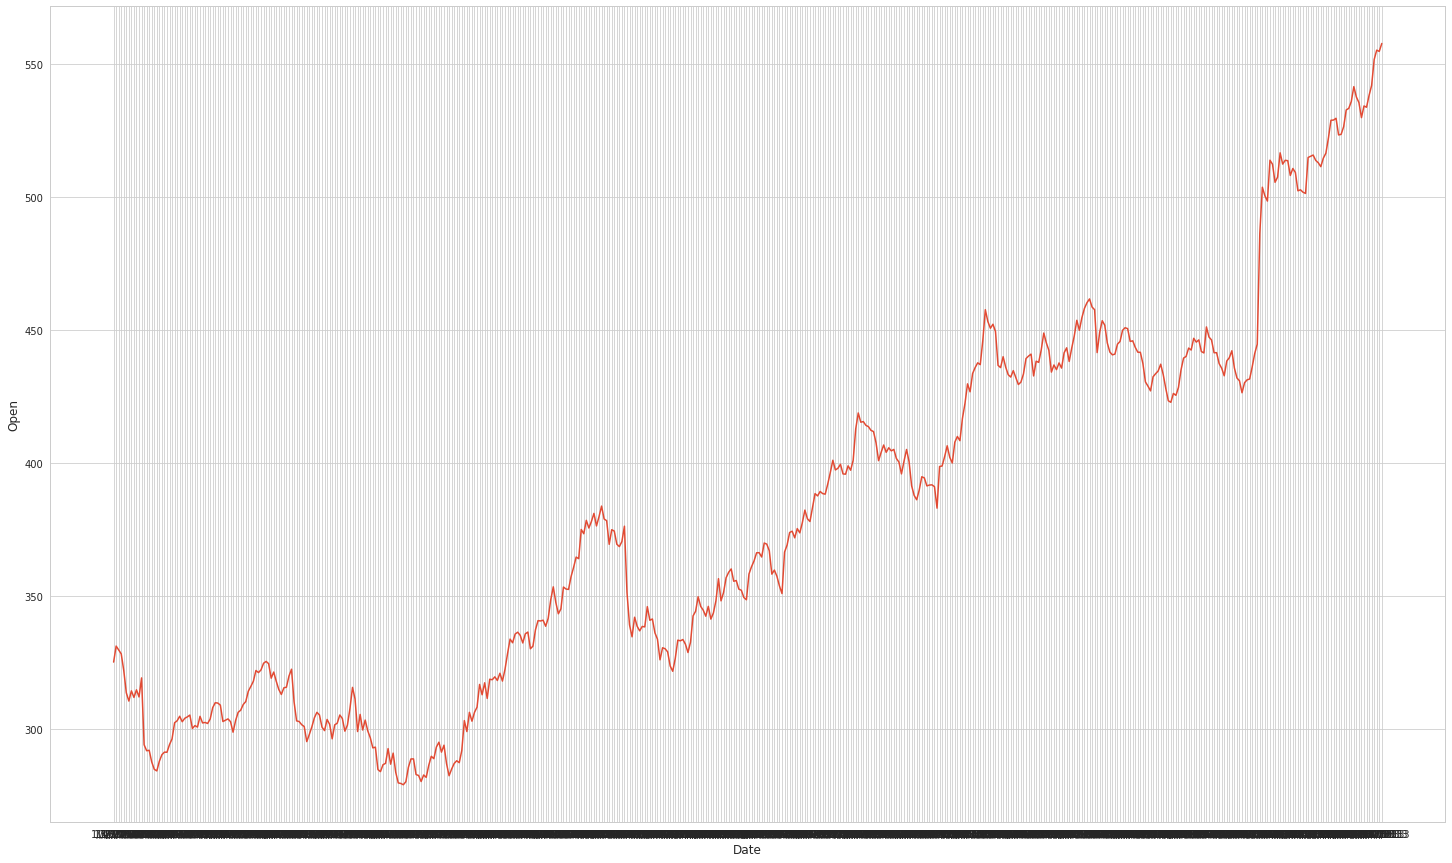

In [23]:
plt.figure(figsize=(25,15))
sns.lineplot(dataset_train['Date'].iloc[:500],dataset_train['Open'].iloc[:500])

In [24]:
training_set = dataset_train.iloc[:,1:2].values

In [25]:
# .iloc[:,1] will create a vector while above code will create a numPy array

In [26]:
training_set.shape

(1258, 1)

In [27]:
## Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)


In [28]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [29]:
## Creating a data structure with ~60 time steps and 1 output

In [30]:
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [31]:
X_train.shape

(1198, 60)

In [32]:
y_train.shape

(1198,)

In [33]:
## Reshaping the dataset

In [34]:
# refer keras documentation->recurrent layers
# no of stock prices, no of timesteps, no of indicators
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [35]:
X_train.shape

(1198, 60, 1)

In [36]:
#### STEP-2 Building and training the RNN model

In [37]:
#Importing keras library and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [38]:
#Initializing the RNN
regressor = Sequential()


In [39]:
#Adding the first LSTM layer and some Droput regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1))) #input_shape=last 2 of x_train
regressor.add(Dropout(0.2))

In [40]:
#Adding a second LSTM layer and some Droput regularization
regressor.add(LSTM(units=50, return_sequences=True)) #units=no. of neurons in this layer
regressor.add(Dropout(0.2))

In [41]:
#Adding a third LSTM layer and some Droput regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [42]:
#Adding a fourth LSTM layer and some Droput regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [43]:
#Adding the output layer
regressor.add(Dense(units=1))

In [44]:
#Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [45]:
#Fitting the RNN to the training set
regressor.fit(x=X_train, y=y_train, batch_size=32 , epochs=100 )

Epoch 1/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0374
Epoch 2/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0070
Epoch 5/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0052
Epoch 10/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0053
Epoch 11/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0043
Epoch 13/100
38/38 [=====

In [ ]:
#### Step-3 Making the predictions and visualizing the results

In [47]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
#We have trained our model on 1Jan,2012 to 31Dec,2016 and
# gonna predict the stock prices of the month Jan,2017

In [ ]:
#Getting the predicted stock price of January,2017
###########################Important Steps Below############################

In [48]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60: ].values


In [49]:
 inputs.shape

(80,)

In [50]:
inputs = inputs.reshape(-1,1)

In [51]:
#In order to convert into 3D shape, it's needed
inputs.shape

(80, 1)

In [52]:
##Scaling the input
inputs = sc.transform(inputs)


In [53]:
#Convert into 3D format
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [54]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [55]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [57]:
predicted_stock_price.shape

(20, 1)

In [ ]:
#Visualizing the results

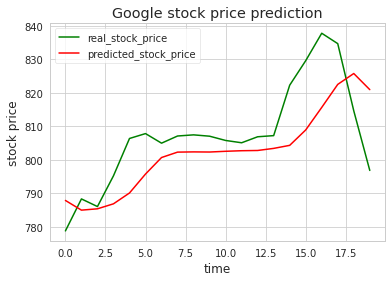

In [62]:
plt.plot(real_stock_price,color='green',label='real_stock_price')
plt.plot(predicted_stock_price,color='red',label='predicted_stock_price')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('Google stock price prediction')
plt.legend()